# Oscillation injection

A testing notebook.

In [1]:
import os
import numpy as np
import pandas as pd

from scipy import signal

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

In [2]:
data_path = "/Users/qualia/Code/Segregated-Dendrite-Deep-Learning/Simulations/"

## Load data

In [10]:
comp = np.loadtxt(os.path.join(data_path, "./Example Simulation/C_hist_0.csv"))
osc = np.loadtxt(os.path.join(data_path, "./Osc Simulation/C_hist_0.csv"))
osc_only = np.loadtxt(os.path.join(data_path, "./Osc Simulation/O_hist_0.csv"))

In [11]:
print(comp.shape[0]/125, osc.shape[0]/125, osc_only.shape[0]/125)

1664.288 1666.896 2506.72


## Plot example trials

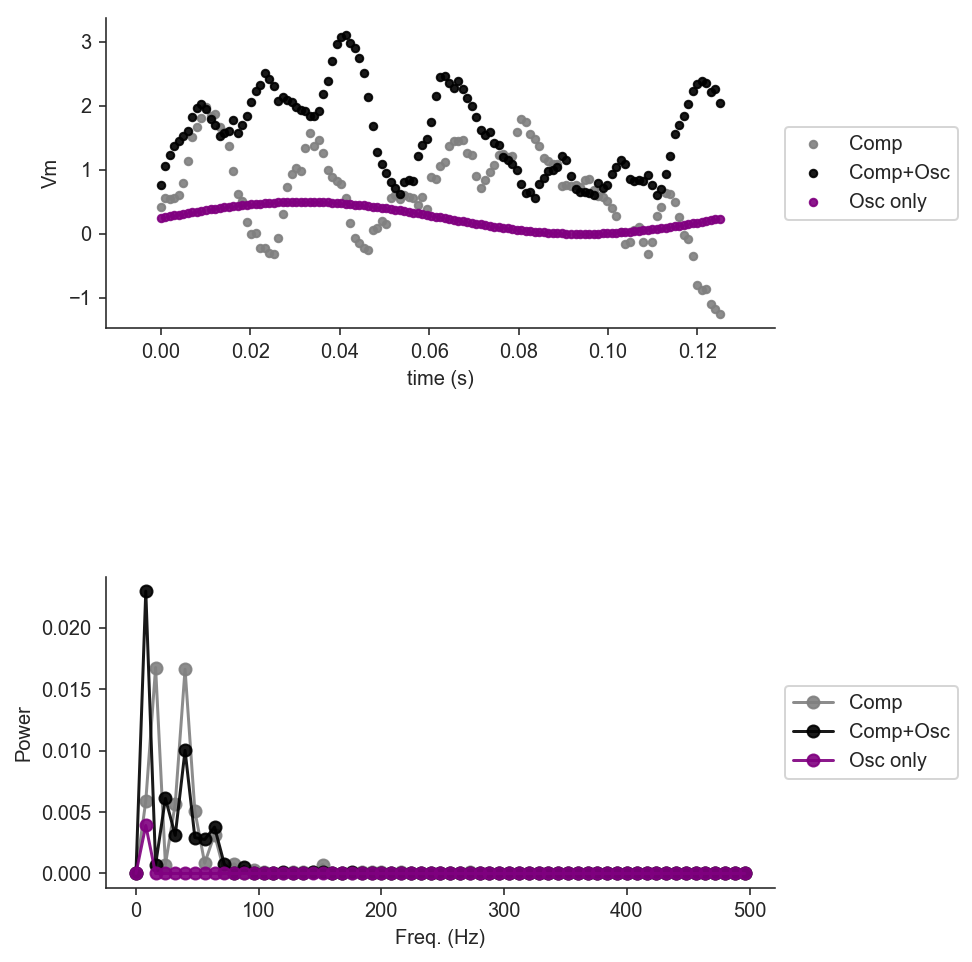

In [25]:
i = 10 # cell number
trial = 0 # Train image number
times = np.linspace(0, .125, 125)

# Get trial timecourse
comp_t = comp[trial*125:(trial+1)*125, i]
osc_t = osc[trial*125:(trial+1)*125, i]
oo_t = osc_only[trial*125:(trial+1)*125, i]

# And its power spectra
freqs_comp, P_comp = signal.periodogram(comp_t, fs=1000)
freqs_osc, P_osc = signal.periodogram(osc_t, fs=1000)
freqs_oo, P_oo = signal.periodogram(oo_t, fs=1000)


# ----------------------------------------------------------------------------
fig = plt.figure(figsize=(6, 8))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Time
plt.subplot(grid[0, 0])
plt.scatter(times, comp_t, color="grey", alpha=.9, s=14, label="Comp")
plt.scatter(times, osc_t, color="black", alpha=.9, s=14, label="Comp+Osc")
plt.scatter(times, oo_t, color="purple", alpha=.9, s=14, label="Osc only")
plt.ylabel("Vm")
plt.xlabel("time (s)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Freq
plt.subplot(grid[1, 0])
plt.plot(freqs_comp, P_comp, color="grey", linestyle='-', marker='o', alpha=.9, label="Comp")
plt.plot(freqs_osc, P_osc, color="black", linestyle='-', marker='o', alpha=.9, label="Comp+Osc")
plt.plot(freqs_oo, P_oo, color="purple", linestyle='-', marker='o', alpha=.9, label="Osc only")
plt.ylabel("Power")
plt.xlabel("Freq. (Hz)")
# plt.xlim(0, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()